In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

#import & read csv
firedata_csv="../source_data/trimmed_and_cleaner_wildland_fire.csv"
firedata_df=pd.read_csv(firedata_csv)

firedata_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
0,0,1,2020-MTLG42-000224,Human,45.785037,-104.457511,US,MT,50.6,2020,8,6,2020,8,6
1,2,3,2017-MTNWS-000878,Human,48.073946,-114.835414,US,MT,50.0,2017,10,17,2017,10,17
2,5,6,2020-MSMNF-000308,Human,31.068196,-89.069725,US,MS,1.0,2020,11,23,2020,11,23
3,6,7,2019-UTUWF-000883,Unknown,40.072836,-111.414812,US,UT,170.0,2019,10,26,2019,10,26
4,7,8,2020-MTCES-006641,Natural,44.637596,-111.575112,US,MT,0.1,2020,8,27,2020,8,27


In [2]:
# Sum Acreage by Fire Cause for all of US
cause_group = firedata_df.groupby("Cause")
cause_group_df = pd.DataFrame(cause_group["Acres Burned"].sum())
cause_group_df


,Acres Burned
Cause,
Human,8.295685e+06
Natural,2.479570e+07
Undetermined,2.751089e+06
Unknown,6.311720e+06


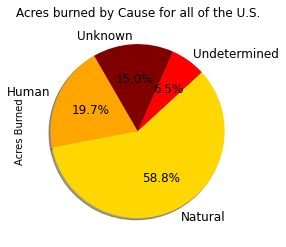

In [3]:
# Create Pie Graph for Fires burned by Cause for all of the U.S.
pie_chart = cause_group_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for all of the U.S.", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("orange","gold", "red", "maroon"), legend=False)

plt.show()

In [5]:
# Filter dataset for Colorado Data only

CO_firedata_df = firedata_df[firedata_df["State"].isin(["CO"])]
CO_firedata_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
14,28,30,2015-COGWD-000216,Human,39.622206,-106.904911,US,CO,0.1,2015,7,5,2015,7,5
15,29,31,2019-COMFX-000187,Human,40.239896,-108.895411,US,CO,90.0,2019,7,28,2019,7,28
19,33,35,2018-COUPD-000251,Unknown,38.145376,-108.552111,US,CO,0.1,2018,7,28,2018,7,28
22,37,41,2017-COWRD-000097,Undetermined,39.860576,-108.318411,US,CO,1.0,2017,6,12,2017,6,12
45,86,94,2015-COGRX-000446,Natural,39.921107,-106.136210,US,CO,0.2,2015,9,25,2015,9,25


In [6]:
# Sum Acreage by Fire Cause for Colorado Only
cause_group_CO = CO_firedata_df.groupby("Cause")
cause_group_CO_df = pd.DataFrame(cause_group_CO["Acres Burned"].sum())
cause_group_CO_df

,Acres Burned
Cause,
Human,440413.580
Natural,276125.385
Undetermined,24183.890
Unknown,271008.720


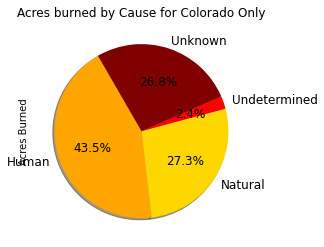

In [7]:
# Create Pie Graph for Fires burned by Cause for Colorado Only
pie_chart = cause_group_CO_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for Colorado Only", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("orange","gold", "red", "maroon"), legend=False)

plt.show()